In [1]:
# Dependencies
import json
import os
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import scipy.stats as st
import random
import datetime

# from api_keys import weather_api_key, g_key
from scipy import stats
# from citipy import citipy
from datetime import date
from scipy.stats import linregress

# Seeding
seed = random.seed(69)

# Date
today = date.today()

In [2]:
twitch_game = "../Data/Twitch_game_data.csv"
twitch_global = "../Data/Twitch_global_data.csv"
sales = "../Data/Video_Games_sales.csv"

clean_og = "../Cleaned_Data/Clearned_Original_Data"
clean_merged_sale_twitch = "../Cleaned_Data/Cleaned_Merged_Sale&Twitch Data"

df = pd.read_csv(clean_merged_sale_twitch)

In [3]:
df.head()

,Unnamed: 0,Rank,Name,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio,Platform,Genre,NA_Sales,Global_Sales
0,5,6,Minecraft,1,2016,10231056,490002 hours,64432,1538,88820,13769,659,20.88,X360,Misc,5.70,9.18
1,6,6,Minecraft,1,2016,10231056,490002 hours,64432,1538,88820,13769,659,20.88,PS3,Misc,2.03,5.26
2,7,6,Minecraft,1,2016,10231056,490002 hours,64432,1538,88820,13769,659,20.88,PS4,Misc,1.48,4.32
3,8,6,Minecraft,1,2016,10231056,490002 hours,64432,1538,88820,13769,659,20.88,XOne,Misc,1.61,2.76
4,9,6,Minecraft,1,2016,10231056,490002 hours,64432,1538,88820,13769,659,20.88,PSV,Misc,0.18,1.96


In [4]:
print(f"The number of unique games in this data set: {df['Name'].nunique()}")

The number of unique games in this data set: 386


In [5]:
grouped_games = df.groupby(df["Name"])
mean_grouped_games = grouped_games.mean()
mean_grouped_games.head()

,Unnamed: 0,Rank,Month,Year,Hours_watched,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio,NA_Sales,Global_Sales
Name,,,,,,,,,,,,,
7 Days to Die,9687.075758,107.515152,6.227273,2018.272727,809400.227273,11135.909091,214.621212,6993.287879,1105.696970,98.409091,11.291970,0.035,0.095
APB Reloaded,514.000000,99.000000,2.000000,2016.000000,277614.000000,17386.000000,37.000000,1073.000000,399.000000,15.000000,25.830000,0.020,0.040
Alien: Isolation,8247.555556,160.944444,6.944444,2017.777778,387170.777778,14817.055556,110.000000,3984.666667,527.222222,24.777778,23.716667,0.166,0.478
Animal Crossing: New Leaf,3611.000000,190.000000,11.000000,2016.000000,117314.000000,13805.000000,16.000000,160.000000,163.000000,1.000000,83.860000,2.030,9.160
Ape Escape,4138.000000,169.500000,7.000000,2016.500000,233091.000000,150698.000000,9.500000,59.000000,313.000000,0.000000,827.515000,0.355,0.835


In [6]:
max_grouped_games = grouped_games.max()
max_grouped_games.head()

,Unnamed: 0,Rank,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio,Platform,Genre,NA_Sales,Global_Sales
Name,,,,,,,,,,,,,,,,
7 Days to Die,18224,192,12,2021,2392372,98259 hours,44237,950,27860,3219,256,24.43,XOne,Action,0.04,0.14
APB Reloaded,514,99,2,2016,277614,10747 hours,17386,37,1073,399,15,25.83,PC,Role-Playing,0.02,0.04
Alien: Isolation,16552,199,12,2020,1291612,9398 hours,73694,408,11440,1738,83,57.29,XOne,Shooter,0.34,1.13
Animal Crossing: New Leaf,3611,190,11,2016,117314,1399 hours,13805,16,160,163,1,83.86,3DS,Simulation,2.03,9.16
Ape Escape,6011,188,7,2017,299969,556 hours,163153,11,72,403,0,1115.52,PS3,Platform,0.71,1.63


In [48]:
# Top 20 viewed games on Twitch by peak viewership
peak_viewers_by_game = max_grouped_games.sort_values(by = ["Peak_viewers"], ascending=False)
top_twenty_peak_view = peak_viewers_by_game.head(20)
# top_twenty_mean_view


,Unnamed: 0,Rank,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio,Platform,Genre,NA_Sales,Global_Sales
Name,,,,,,,,,,,,,,,,
Grand Theft Auto V,18043,34,12,2021,253419456,936367 hours,1140656,7043,211141,341075,3489,114.88,XOne,Action,9.66,21.04
World of Warcraft,18056,15,12,2021,90202480,949764 hours,1103295,25791,126563,124925,3154,57.08,PC,Role-Playing,0.08,6.29
Minecraft,18052,35,12,2021,87784445,842914 hours,964018,9865,450593,122824,5252,34.31,XOne,Misc,5.70,9.18
Overwatch,18073,30,12,2021,35080281,991752 hours,461851,9741,152548,47214,1605,69.61,XOne,Shooter,0.81,2.14
Rocket League,18068,41,12,2021,26303228,956952 hours,243644,3937,293877,36583,1878,37.51,XOne,Sports,0.05,0.37
Chess,18085,200,12,2021,22069662,98570 hours,370111,342,16604,32890,156,301.66,PS,Strategy,0.05,0.09
Demon's Souls,18274,200,12,2021,23132540,63043 hours,222803,853,16369,32173,224,174.45,PS3,Role-Playing,0.97,1.82
God of War,17775,195,12,2021,20301689,84858 hours,292083,5006,67022,28236,755,37.39,PS2,Action,2.71,4.45
Tom Clancy's The Division,11170,183,12,2019,19700030,94116 hours,159832,5280,158048,26514,1357,72.75,XOne,Shooter,1.35,3.80


The most viewed game by peak viewers in this data set is: Grand Theft Auto V


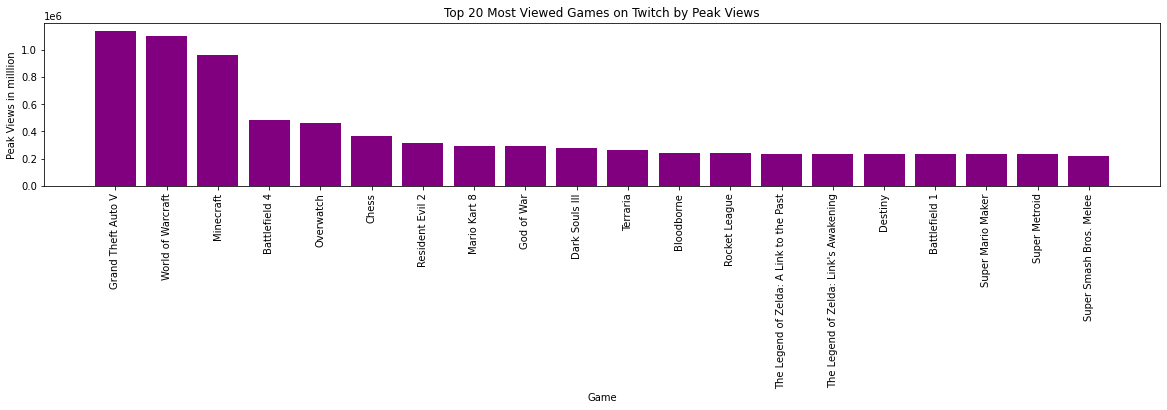

In [53]:
# Most viewed game by peak viewership
peak_viewers = grouped_games["Peak_viewers"].max()
most_viewed_game = df.loc[df["Peak_viewers"] == peak_viewers.max()]

x = np.arange(len(top_twenty_peak_view))
peak_viewers_value_count = grouped_games["Peak_viewers"].value_counts()

print(f"The most viewed game by peak viewers in this data set is: {most_viewed_game.iloc[0, 2]}")

plt.figure(figsize=(20,3))
plt.bar(x, top_twenty_peak_view["Peak_viewers"], color = "purple")

tick_locations = [value for value in x]
plt.xticks(tick_locations, top_twenty_peak_view.index, rotation = "vertical")

plt.title("Top 20 Most Viewed Games on Twitch by Peak Views")
plt.xlabel("Game")
plt.ylabel("Peak Views in milllion")

# plt.tight_layout()
plt.savefig("output_figures/top_20_peak_views.png")
plt.show() 

The most viewed game by average viewers in this data set is: Grand Theft Auto V


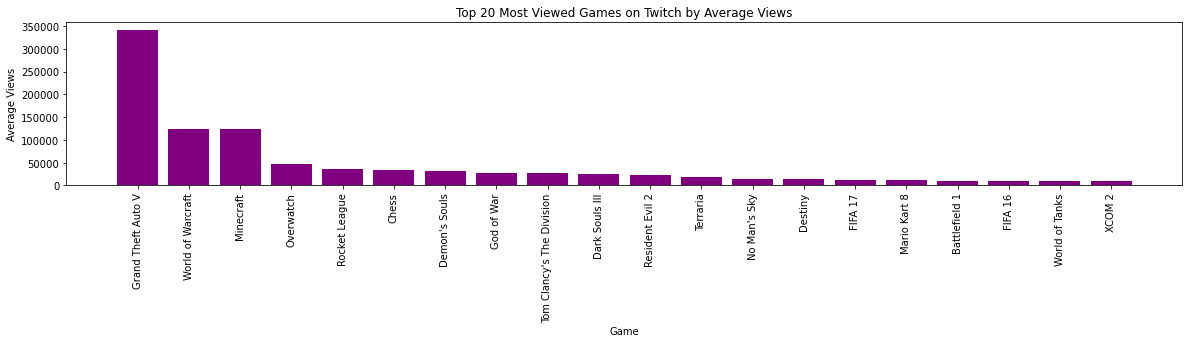

In [54]:
# Top 20 viewed games on Twitch by average viewership
mean_viewers_by_game = max_grouped_games.sort_values(by = ["Avg_viewers"], ascending=False)
top_twenty_mean_view = mean_viewers_by_game.head(20)

# Most viewed game by average viewership
mean_viewers = grouped_games["Avg_viewers"].max()
most_viewed_game = df.loc[df["Avg_viewers"] == mean_viewers.max()]

x = np.arange(len(top_twenty_mean_view))
mean_viewers_value_count = grouped_games["Avg_viewers"].value_counts()

print(f"The most viewed game by average viewers in this data set is: {most_viewed_game.iloc[0, 2]}")

plt.figure(figsize=(20,3))
plt.bar(x, top_twenty_mean_view["Avg_viewers"], color = "purple")

tick_locations = [value for value in x]
plt.xticks(tick_locations, top_twenty_mean_view.index, rotation = "vertical")

plt.title("Top 20 Most Viewed Games on Twitch by Average Views")
plt.xlabel("Game")
plt.ylabel("Average Views")

# plt.tight_layout()
plt.savefig("output_figures/top_20_mean_views.png")
plt.show() 

## Initial observations and comments

* GTA V, WoW, and Minecraft have the most views on Twitch.
* These game are not considered competitive games.
* Perhaps these games are more accesible? 

The r-value is 0.06543303604793595.


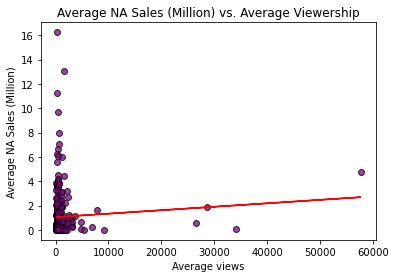

In [56]:
# Relationship between mean NA sales and mean viewership
# The reason why the mean of the two variables are chosen over the maximum is because the maximum point of sales varies by time,
# whereas the mean of both are wholistic throughout time

# variables
x = mean_grouped_games["Avg_viewers"]
y = mean_grouped_games["NA_Sales"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x, y, color = "purple", edgecolors="black", alpha = 0.75)
plt.plot(x, regress_values, "r-")
plt.title(f"Average NA Sales (Million) vs. Average Viewership")
plt.xlabel("Average views")
plt.ylabel("Average NA Sales (Million)")

print(f"The r-value is {rvalue}.")
plt.savefig("output_figures/avg_NAsales_vs_avg_view.png")
plt.show()

The r-value is 0.13628281505644307.


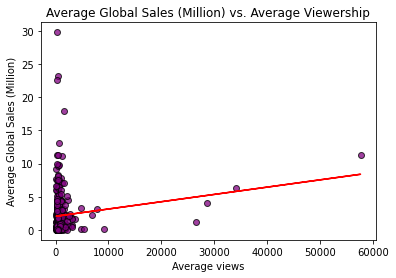

In [57]:
# Relationship between mean global sales and mean viewership
# The reason why the mean of the two variables are chosen over the maximum is because the maximum point of sales varies by time,
# whereas the mean of both are wholistic throughout time

# variables
x = mean_grouped_games["Avg_viewers"]
y = mean_grouped_games["Global_Sales"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x, y, color="purple", edgecolors="black", alpha = 0.75)
plt.plot(x, regress_values, "r-")
plt.title(f"Average Global Sales (Million) vs. Average Viewership")
plt.xlabel("Average views")
plt.ylabel("Average Global Sales (Million)")

print(f"The r-value is {rvalue}.")
plt.savefig("output_figures/avg_global_sales_vs_avg_view.png")
plt.show()

## Some Comments

Average global and NA sales both have little to no correlation with average viewership.
* Could be because general average viewership and sales couldn't be easily observed? And needed to analyse specific time frames?
* Or there is just very little correlation in general?

In [22]:
# Most viewed game by year

df_year = df.groupby(["Year", "Name"])
max_df_year = df_year.max()
mean_df_year = df_year.mean()

In [23]:
max_df_year.head()

Unnamed: 0  Rank  Month  Hours_watched  \
Year Name                                                                
2016 7 Days to Die                    3743   192     12        2063116   
     APB Reloaded                      514    99      2         277614   
     Alien: Isolation                 3904   188     12         264294   
     Animal Crossing: New Leaf        3611   190     11         117314   
     Ape Escape                       2266   188      7         166213   

                               Hours_Streamed  Peak_viewers  Peak_channels  \
Year Name                                                                    
2016 7 Days to Die                 8921 hours         36862            950   
     APB Reloaded                 10747 hours         17386             37   
     Alien: Isolation              9398 hours         10235             74   
     Animal Crossing: New Leaf     1399 hours         13805             16   
     Ape Escape                     149 hours        138243              8   

                                Streamers  Avg_viewers  Avg_channels  \
Year Name                                                              
2016 7 Days to Die                  27860         2776           256   
     APB Reloaded                    1073          399            15   
     Alien: Isolation                3968          355            15   
     Animal Crossing: New Leaf        160          163             1   
     Ape Escape                        46          223             0   

                                Avg_viewer_ratio Platform         Genre  \
Year Name                                                                 
2016 7 Days to Die                         22.23     XOne        Action   
     APB Reloaded                          25.83       PC  Role-Playing   
     Alien: Isolation                      28.02     XOne       Shooter   
     Animal Crossing: New Leaf             83.86      3DS    Simulation   
     Ape Escape                          1115.52      PS3      Platform   

                                NA_Sales  Global_Sales  
Year Name                                               
2016 7 Days to Die                  0.04          0.14  
     APB Reloaded                   0.02          0.04  
     Alien: Isolation               0.34          1.13  
     Animal Crossing: New Leaf      2.03          9.16  
     Ape Escape                     0.71          1.63

In [24]:
mean_df_year.head()

Unnamed: 0        Rank      Month  \
Year Name                                                            
2016 7 Days to Die              1966.666667   95.333333   6.500000   
     APB Reloaded                514.000000   99.000000   2.000000   
     Alien: Isolation           2196.714286  165.714286   6.857143   
     Animal Crossing: New Leaf  3611.000000  190.000000  11.000000   
     Ape Escape                 2265.500000  188.000000   7.000000   

                                Hours_watched   Peak_viewers  Peak_channels  \
Year Name                                                                     
2016 7 Days to Die              553330.000000    8403.166667     232.833333   
     APB Reloaded               277614.000000   17386.000000      37.000000   
     Alien: Isolation           164710.571429    6703.000000      44.142857   
     Animal Crossing: New Leaf  117314.000000   13805.000000      16.000000   
     Ape Escape                 166213.000000  138243.000000       8.000000   

                                  Streamers  Avg_viewers  Avg_channels  \
Year Name                                                                
2016 7 Days to Die              6969.333333   750.750000     73.083333   
     APB Reloaded               1073.000000   399.000000     15.000000   
     Alien: Isolation           2326.000000   224.142857     10.428571   
     Animal Crossing: New Leaf   160.000000   163.000000      1.000000   
     Ape Escape                   46.000000   223.000000      0.000000   

                                Avg_viewer_ratio  NA_Sales  Global_Sales  
Year Name                                                                 
2016 7 Days to Die                     12.065000     0.035         0.095  
     APB Reloaded                      25.830000     0.020         0.040  
     Alien: Isolation                  20.088571     0.166         0.478  
     Animal Crossing: New Leaf         83.860000     2.030         9.160  
     Ape Escape                      1115.520000     0.355         0.835

In [33]:
peak_viewers_year = max_df_year.sort_values("Peak_viewers", ascending=False)
# peak_viewers_year.head() # Not sorting by year but only by peak viewers tho:(

Unnamed: 0  Rank  Month  Hours_watched  \
Year Name                                                         
2021 Grand Theft Auto V       18043     8      6      253419456   
2019 World of Warcraft        13534    12     12       89821179   
2021 Minecraft                18052     7      6       87784445   
2020 World of Warcraft        16558    13     12       90202480   
     Minecraft                16564    12     12       76540606   

                        Hours_Streamed  Peak_viewers  Peak_channels  \
Year Name                                                             
2021 Grand Theft Auto V  2510018 hours       1140656           7043   
2019 World of Warcraft    949764 hours       1103295          19085   
2021 Minecraft           3591863 hours        964018           9865   
2020 World of Warcraft    940687 hours        933430          25791   
     Minecraft            842914 hours        591932           7060   

                         Streamers  Avg_viewers  Avg_channels  \
Year Name                                                       
2021 Grand Theft Auto V     211141       341075          3489   
2019 World of Warcraft      126563       124925          3148   
2021 Minecraft              450593       122824          5252   
2020 World of Warcraft      108723       121403          3154   
     Minecraft              346527       106454          3682   

                         Avg_viewer_ratio Platform         Genre  NA_Sales  \
Year Name                                                                    
2021 Grand Theft Auto V            100.96     XOne        Action      9.66   
2019 World of Warcraft              57.08       PC  Role-Playing      0.08   
2021 Minecraft                      27.10     XOne          Misc      5.70   
2020 World of Warcraft              38.48       PC  Role-Playing      0.08   
     Minecraft                      34.31     XOne          Misc      5.70   

                         Global_Sales  
Year Name                              
2021 Grand Theft Auto V         21.04  
2019 World of Warcraft           6.29  
2021 Minecraft                   9.18  
2020 World of Warcraft           6.29  
     Minecraft                   9.18

## Viewership vs. Channels

In [38]:
# Relationship between viewership vs. channels
# nvm shan did that lol

## Timeframe analysis:
* Groupby year and months to see when is each game's peak viewership.

In [39]:
df.head()

,Unnamed: 0,Rank,Name,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio,Platform,Genre,NA_Sales,Global_Sales
0,5,6,Minecraft,1,2016,10231056,490002 hours,64432,1538,88820,13769,659,20.88,X360,Misc,5.70,9.18
1,6,6,Minecraft,1,2016,10231056,490002 hours,64432,1538,88820,13769,659,20.88,PS3,Misc,2.03,5.26
2,7,6,Minecraft,1,2016,10231056,490002 hours,64432,1538,88820,13769,659,20.88,PS4,Misc,1.48,4.32
3,8,6,Minecraft,1,2016,10231056,490002 hours,64432,1538,88820,13769,659,20.88,XOne,Misc,1.61,2.76
4,9,6,Minecraft,1,2016,10231056,490002 hours,64432,1538,88820,13769,659,20.88,PSV,Misc,0.18,1.96


In [51]:
game_by_year_month = df.groupby(["Year", "Month", "Name"])
max_game_by_year_month = game_by_year_month.max()
max_game_by_year_month

Unnamed: 0  Rank  \
Year Month Name                                                     
2016 1     7 Days to Die                                219   129   
           Alien: Isolation                             240   135   
           Banjo-Kazooie                                264   148   
           Battlefield 4                                108    61   
           Blast Corps                                  323   185   
...                                                     ...   ...   
2021 6     The Legend of Zelda: Ocarina of Time       18277   193   
           The Sims 4                                 18138    76   
           The Witcher 3: Wild Hunt                   18172   104   
           World of Tanks                             18114    56   
           World of Warcraft                          18056    10   

                                                 Hours_watched Hours_Streamed  \
Year Month Name                                                                 
2016 1     7 Days to Die                                269681    12131 hours   
           Alien: Isolation                             264294    11799 hours   
           Banjo-Kazooie                                241250     2234 hours   
           Battlefield 4                                672524    96185 hours   
           Blast Corps                                  178810       42 hours   
...                                                        ...            ...   
2021 6     The Legend of Zelda: Ocarina of Time         721669    37154 hours   
           The Sims 4                                  2785369   112041 hours   
           The Witcher 3: Wild Hunt                    1693882    76610 hours   
           World of Tanks                              4180869   127693 hours   
           World of Warcraft                          52816476  1323880 hours   

                                                 Peak_viewers  Peak_channels  \
Year Month Name                                                                
2016 1     7 Days to Die                                 4405             44   
           Alien: Isolation                              9590             42   
           Banjo-Kazooie                               108131             28   
           Battlefield 4                                 6349            271   
           Blast Corps                                  96318             18   
...                                                       ...            ...   
2021 6     The Legend of Zelda: Ocarina of Time         11640            153   
           The Sims 4                                  133635            471   
           The Witcher 3: Wild Hunt                     18333            228   
           World of Tanks                               30557            397   
           World of Warcraft                           428127           8423   

                                                 Streamers  Avg_viewers  \
Year Month Name                                                           
2016 1     7 Days to Die                              1240          362   
           Alien: Isolation                           3968          355   
           Banjo-Kazooie                               547          324   
           Battlefield 4                             21087          905   
           Blast Corps                                  25          240   
...                                                    ...          ...   
2021 6     The Legend of Zelda: Ocarina of Time       3150         1003   
           The Sims 4                                16798         3873   
           The Witcher 3: Wild Hunt                   7842         2355   
           World of Tanks                             7669         5814   
           World of Warcraft                         64312        73458   

                                                 Avg_channels  \
Year Month Name

In [52]:
max_game_by_year_month.sort_values("Peak_viewers", ascending=False).head(30)

Unnamed: 0  Rank  Hours_watched Hours_Streamed  \
Year Month Name                                                                 
2021 5     Grand Theft Auto V       17795     2      253419456  2510018 hours   
     4     Grand Theft Auto V       17544     2      239438984  2508876 hours   
2019 8     World of Warcraft        12538     4       67894760  1594116 hours   
2021 5     Minecraft                17805     7       76661535  2829132 hours   
2020 11    World of Warcraft        16318     7       54668977  1708742 hours   
2021 1     Minecraft                16809     6       80076090  3591863 hours   
     4     Minecraft                17554     7       79728626  3112654 hours   
     3     Minecraft                17311     6       87784445  3419021 hours   
     2     Minecraft                17062     5       82415310  3524597 hours   
     6     Grand Theft Auto V       18043     2      170602312  2134054 hours   
2020 12    Minecraft                16564     5       72142619  2736322 hours   
     11    Minecraft                16316     5       76540606  2231010 hours   
2018 8     World of Warcraft         9423     4       56190633  1424162 hours   
2021 3     Grand Theft Auto V       17302     2      184577838  2255433 hours   
     2     Grand Theft Auto V       17055     3      137704722  2006058 hours   
     6     Minecraft                18052     6       72365696  2841782 hours   
2016 5     Battlefield 4             1394    44        1235842   129318 hours   
2020 5     Minecraft                14822     9       41091438  1782172 hours   
     10    Minecraft                16075     9       49798217  1802763 hours   
2018 1     Overwatch                 7512     6       32620891  1118103 hours   
2020 7     Minecraft                15331     7       52864781  2081006 hours   
     9     Minecraft                15830     8       39056368  1549038 hours   
2021 6     World of Warcraft        18056    10       52816476  1323880 hours   
2020 12    World of Warcraft        16558     4       90202480  2343848 hours   
     6     Minecraft                15083    10       38878256  1728072 hours   
           Grand Theft Auto V       15072     4      100533035  1681199 hours   
     7     Grand Theft Auto V       15323     4       94129970  1614402 hours   
2019 9     World of Warcraft        12787     1       89821179  2264059 hours   
2020 8     Grand Theft Auto V       15573     6       83320277  1515588 hours   
           Minecraft                15581     9       40361660  1942298 hours   

                               Peak_viewers  Peak_channels  Streamers  \
Year Month Name                                                         
2021 5     Grand Theft Auto V       1140656           6978     197818   
     4     Grand Theft Auto V       1105818           7043     211141   
2019 8     World of Warcraft        1103295          19085     111263   
2021 5     Minecraft                 964018           7751     357562   
2020 11    World of Warcraft         933430          25791      93850   
2021 1     Minecraft                 931417           9865     443494   
     4     Minecraft                 749947           8863     405918   
     3     Minecraft                 663533           9509     441025   
     2     Minecraft                 647145           9853     450593   
     6     Grand Theft Auto V        609223           5930     165667   
2020 12    Minecraft                 591932           7060     346527   
     11    Minecraft                 591072           6133     282145   
2018 8     World of Warcraft         590245          15619      95903   
2021 3     Grand Theft Auto V        589654           6387     186339   
     2     Grand Theft Auto V        506815           6008     175699   
     6     Minecraft                 499342           7623     362028   
2016 5     Battlefield 4             482854            355      32579   
2020 5     Minecraft                 481719        